<a href="https://colab.research.google.com/github/yesu1995/yesu1995/blob/main/Copy_of_Cancer_Detection_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf
from tqdm import tqdm

In [ ]:
class_names = ['No_DR','Mild','Moderate','Severe NDPR','PDR']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [ ]:
def load_data():

    datasets = ['C:/Users/Hyndavi/Music/DCNN RETINA/DCNN RETINA/train', 'C:/Users/Hyndavi/Music/DCNN RETINA/DCNN RETINA/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the imageC:\Users\Hyndavi\Music\DCNN RETINA\DCNN RETINA\dataset\train\Moderate
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/Hyndavi/Music/DCNN RETINA/DCNN RETINA/train


100%|███████████████████████████████████████████████████████████████████████████████| 193/193 [00:01<00:00, 134.98it/s]


Loading C:/Users/Hyndavi/Music/DCNN RETINA/DCNN RETINA/test


100%|███████████████████████████████████████████████████████████████████████████████| 193/193 [00:01<00:00, 133.29it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3657
Number of testing examples: 3657
Each image is of size: (150, 150)


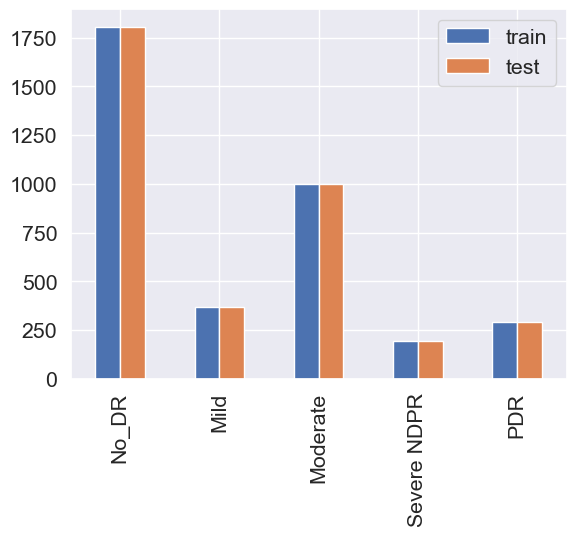

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

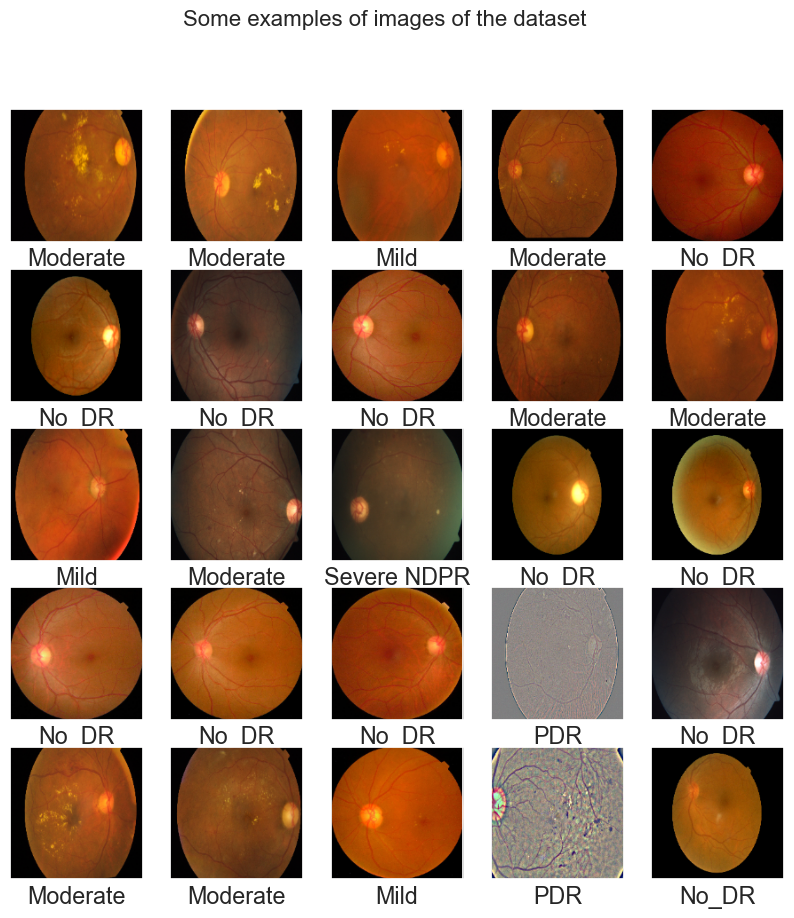

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
Categories=['No_DR','Mild','Moderate','Severe NDPR','PDR']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='C:/Users/Hyndavi/Music/DCNN RETINA/DCNN RETINA/dataset/train/'
#path which contains all the categories of images
for i in Categories:

	print(f'loading... category : {i}')
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(150,150,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
	print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


loading... category : No_DR
loaded category:No_DR successfully
loading... category : Mild
loaded category:Mild successfully
loading... category : Moderate
loaded category:Moderate successfully
loading... category : Severe NDPR
loaded category:Severe NDPR successfully
loading... category : PDR
loaded category:PDR successfully


In [ ]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape


(3657, 67501)

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]


In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)


In [ ]:
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}


svc=svm.SVC(probability=True)

model=GridSearchCV(svc,param_grid)


In [ ]:

from sklearn.svm import SVC

svc = SVC()


In [ ]:
svc_Model = svc.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error

from sklearn.metrics import classification_report
svc_pred =svc_Model.predict(x_test)

svc_acc = accuracy_score(y_test, svc_pred)
mse=mean_squared_error(y_test, svc_pred)
print(svc_acc)
print(mse)
print(classification_report(y_test, svc_pred))



0.8046448087431693
0.4603825136612022
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       361
           1       0.42      0.31      0.36        74
           2       0.71      0.80      0.75       200
           3       0.56      0.13      0.21        39
           4       1.00      1.00      1.00        58

    accuracy                           0.80       732
   macro avg       0.72      0.64      0.65       732
weighted avg       0.78      0.80      0.79       732



# batch_size =15
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

C:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 656ms/step - accuracy: 0.5111 - loss: 1.2667 - val_accuracy: 0.7391 - val_loss: 0.6720
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 613ms/step - accuracy: 0.7754 - loss: 0.5732 - val_accuracy: 0.7801 - val_loss: 0.5941
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 595ms/step - accuracy: 0.8166 - loss: 0.4984 - val_accuracy: 0.7773 - val_loss: 0.5929
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 595ms/step - accuracy: 0.8136 - loss: 0.4896 - val_accuracy: 0.7404 - val_loss: 0.6598
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 587ms/step - accuracy: 0.8219 - loss: 0.4625 - val_accuracy: 0.7787 - val_loss: 0.6025
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 609ms/step - accuracy: 0.8410 - loss: 0.4421 - val_accuracy: 0.7910 - val_loss: 0.5884
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 624ms/step - accuracy: 0.8456 - loss: 0.4086 - val_accuracy: 0.7719 - val_loss: 0.5826
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 607ms/step - accuracy: 0.8429 - loss: 0.4018 - val_accu

In [ ]:
def plot_accuracy_loss(history):

    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

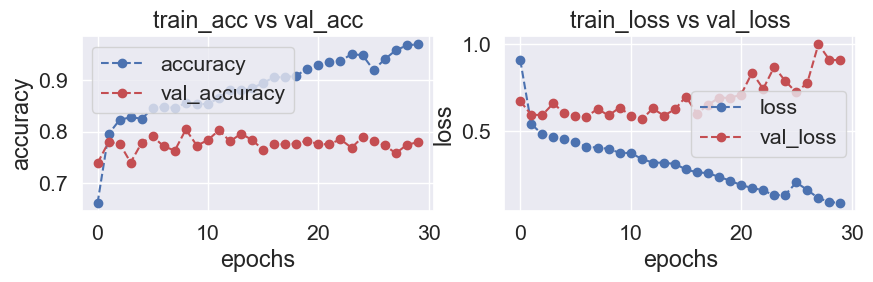

In [ ]:
plot_accuracy_loss(history)

In [ ]:
#test_loss =cnn_model.evaluate(test_images, test_labels)

115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step


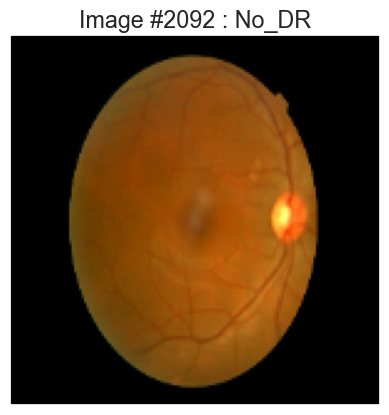

In [ ]:
predictions =cnn_model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

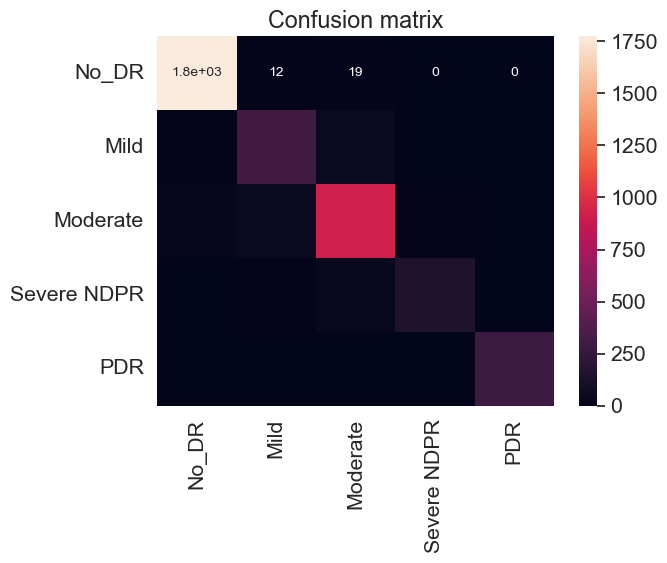

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Actual values
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

# Predicted values
y_pred = [1, 1, 1, 1, 0, 0, 1, 0, 1, 0]

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the values
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)


True Positives: 4
True Negatives: 3
False Positives: 2
False Negatives: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1]


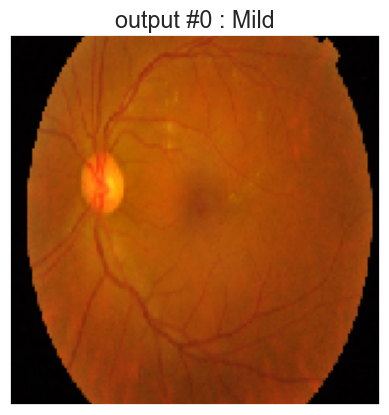

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/Hyndavi/Music/DCNN RETINA/DCNN RETINA/dataset/test/Mild/01b3aed3ed4c.png', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions =cnn_model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()